Top 10 columns with highest variance:
wdi_nv_agr_totl_kn          6.637511e+22
wdi_nv_agr_totl_kd          1.016447e+18
wdi_sp_pop_totl             1.458976e+14
splag_wdi_sm_pop_refg_or    1.651301e+12
splag_wdi_ag_lnd_frst_k2    3.086236e+11
splag_wdi_sm_pop_netm       4.023980e+10
wdi_sm_pop_refg_or          2.785110e+10
wdi_sm_pop_netm             5.826356e+09
wdi_ag_lnd_frst_k2          2.252124e+09
Unnamed: 0                  1.219165e+08
dtype: float64


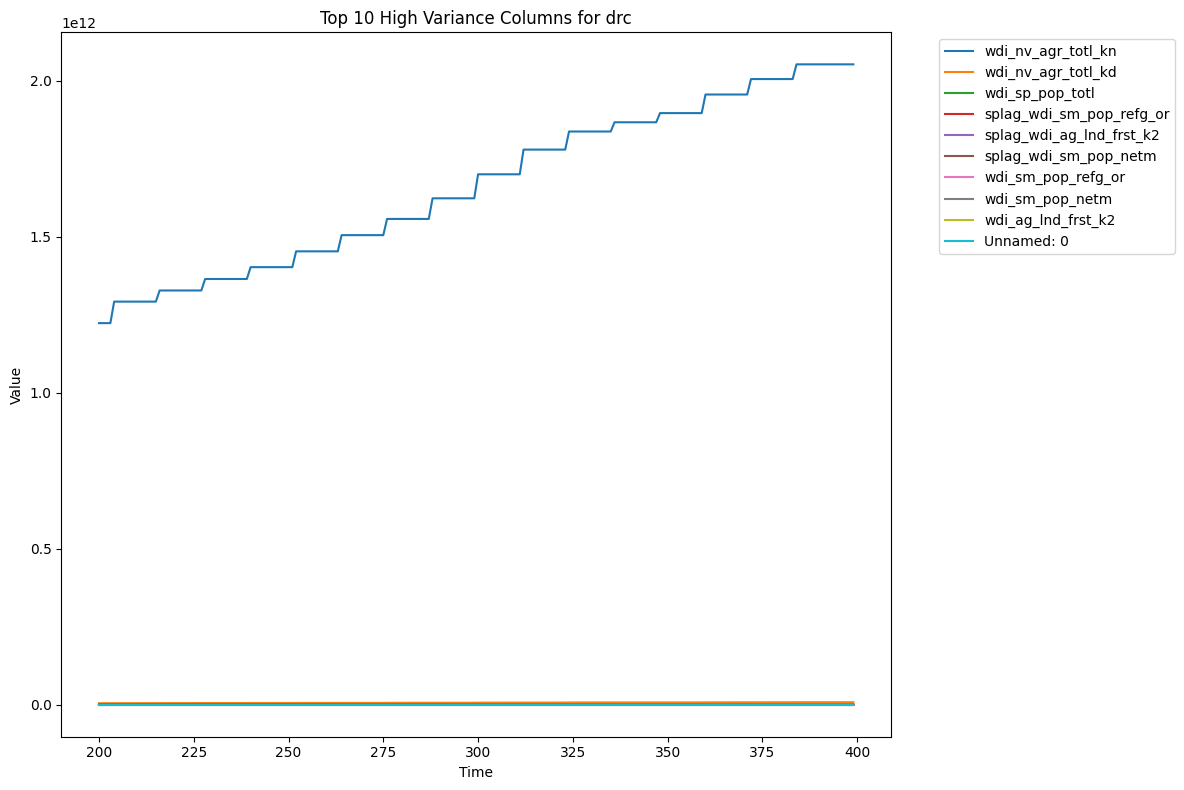

In [33]:
import matplotlib.pyplot as plt
from microprediction import MicroReader
import pandas as pd
import numpy as np

all_history = pd.read_csv('../../data/views/drc.csv')
# history = all_history[['ged_sb']]
history = all_history[200:400]

window = None
country = "drc"
# if window is not None:
#     # Calculate the rolling average for the last three months (assuming daily data, 90 days)
#     history['rolling_avg'] = history['ged_sb'].shift(1).rolling(window=window).mean()
#     history.to_csv(f'{country}_rolling{window}_long.csv', index=False)
# else:
#     history.to_csv(f'{country}_no_rolling.csv', index=False)

# history.head()

# Calculate variance for each column
variances = history.var()

# Sort columns by variance in descending order and get top 10
top_10_variance = variances.sort_values(ascending=False).head(10)

print("Top 10 columns with highest variance:")
print(top_10_variance)

# Plotting the top 10 high variance columns
plt.figure(figsize=(12, 8))
for column in top_10_variance.index:
    plt.plot(history[column], label=column)

plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Top 10 High Variance Columns for {country}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




# plt.plot(history['ged_sb'], label="True Values")
# if window is not None:
#     plt.plot(history['rolling_avg'], label="Rolling Average")
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.title(f"True vs Rolling Average Historical Data for sri lanka")
# plt.legend()
# plt.show()


In [34]:
drc_features = [
    'wdi_nv_agr_totl_kn',      # Value added from agriculture in constant local currency
    'wdi_sp_pop_totl',         # Population in total
    'splag_wdi_sm_pop_refg_or', # Refugee population by country or territory of origin
    'splag_wdi_ag_lnd_frst_k2', # Forest area (sq. km)
    'ged_sb'                   # Target variable
]

# Select only the specified features and the target variable
selected_data = history[drc_features]

# Save the selected data to a CSV file
selected_data.to_csv('drc_features.csv', index=False)